<a href="https://colab.research.google.com/github/MRROOX/mii-analisis-de-datos/blob/master/Tarea1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 - Clustering Módulo Análisis de Datos, EMI2016-1, 1° Semestre 2019

**Alumno: Felipe Quezada Gajardo** 

**Instrucciones**

* (i) Construir una matriz de incidencia entre clientes y ofertas. Los datos serı́an los clientes que se caracterizan por un vector de dimensión 32 y componentes binarias.
* (ii) Correr el algoritmo kmeans para encontrar los clusters. Para ello se puede utilizar en Python el objeto KMeans de sklearn.clusters.
* (iii) Caracterizar los clusters de clientes resultantes en base a las caracterı́sticas de las ofertas más utilizadas en cada cluster.
* (iv) Identificar el número más adecuado de clusters utilizando el método del codo, y el de silhouette (objeto silhouette score de sklearn.metrics).

In [0]:
# Import de dependencias
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [4]:
# Para subir el archivo a Collabs 
# Se debe cargar el Archivo Wine_Transactions.xlsx desde nuestro PC.
from google.colab import files
uploaded = files.upload()

Saving Wine_Transactions.xlsx to Wine_Transactions.xlsx


In [25]:
# Cargamos el archivo .xlsx a una Variable
import io
wine_transactions = pd.ExcelFile(io.BytesIO(uploaded['Wine_Transactions.xlsx']))
#print(wine_transactions)


# Se lée la hoja de OfferInformation
OfferInformation = pd.read_excel(wine_transactions, sheet_name=0)
#print(OfferInformation)


# Se lée la hoja de Transactions
Transactions = pd.read_excel(wine_transactions, sheet_name=1)
#print(Transactions)

# Se unen las dos hojas para que sea mas facil trabajar con los datos.
datos_entrada = pd.merge(OfferInformation, Transactions)
print(datos_entrada)


     Offer #  Campaign  ... Past Peak  Customer Last Name
0          1   January  ...     False              Thomas
1          1   January  ...     False             Jackson
2          1   January  ...     False            Mitchell
3          1   January  ...     False            Peterson
4          1   January  ...     False                Wood
5          1   January  ...     False               Price
6          1   January  ...     False              Foster
7          1   January  ...     False             Sanders
8          1   January  ...     False              Butler
9          1   January  ...     False              Fisher
10         2   January  ...     False               Smith
11         2   January  ...     False           Rodriguez
12         2   January  ...     False              Martin
13         2   January  ...     False             Jackson
14         2   January  ...     False            Campbell
15         2   January  ...     False            Mitchell
16         2  

In [87]:
# Se construye la matriz de incidencia entre clientes y ofertas del punto i, se utiliza
# la funcion pivot_table
# Se obtienen los datos de Ofertas "Offer #" y los Consumidores "Customer Last Name"
pivot = pd.pivot_table(datos_entrada, index=["Offer #"], columns=["Customer Last Name"], aggfunc=len, fill_value='0')

matriz_pivot = pivot = pd.pivot_table(Transactions, index=["Offer #"], columns=["Customer Last Name"], aggfunc=len, fill_value='0')

#print(matriz_pivot)

#print(pivot)

# Convertir la matriz generada en una matriz para ser usada con numpy
# Y posteriormente aplicar los metodos del codo y silhouette.

X = matriz_pivot.as_matrix()
X = np.matrix(X)
data_metodos = X.T

print('Matriz Solo de Datos para Metodo del Codo y Silhouette')
print(data_metodos)

# Se aplica la transpuesta de la matriz, y se obtiene la matriz de incidencia.

matriz_incidencia = matriz_pivot.T

matriz_resultados = matriz_incidencia

print('Matriz de Incidencia 100x32')
print(matriz_incidencia)

# Aplicacion de el algoritmo de Kmeans del punto ii considerando 5 cluster optimos sugeridos
# por el metodo de Silhouette expuesto al final.



matriz_resultados['Cluster'] = KMeans(n_clusters=5).fit_predict(matriz_resultados)

#matriz['Cluster'] = KMeans(n_clusters=5).fit_predict(matriz[matriz.columns[2:]])

# Se imprime la cantidad de veces que se repite un número en la matriz por cluster
#print(matriz.Cluster.value_counts())
#print(matriz_incidencia)
print('Matriz de Resultados en donde se Muestra los Costumer con sus Cluster respectivo')
print(matriz_resultados)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


Matriz Solo de Datos para Metodo del Codo y Silhouette
[['0' '0' '0' ... 1.0 '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ...
 [1.0 '0' '0' ... '0' 1.0 '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' 1.0 1.0]]
Matriz de Incidencia 100x32
Offer #            1  2  3  4  5  6  7  8  9  10  ... 23 24 25 26 27 28 29 30 31 32
Customer Last Name                                ...                              
Adams               0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  1  1  0  0
Allen               0  0  0  0  0  0  0  0  1  0  ...  0  0  0  0  1  0  0  0  0  0
Anderson            0  0  0  0  0  0  0  0  0  0  ...  0  1  0  1  0  0  0  0  0  0
Bailey              0  0  0  0  0  0  1  0  0  0  ...  0  0  0  0  0  0  0  1  0  0
Baker               0  0  0  0  0  0  1  0  0  1  ...  0  0  0  0  0  0  0  0  1  0
Barnes              0  0  0  0  0  0  0  0  0  1  ...  0  0  0  0  0  0  0  0  1  0
Bell                0  1  0  0  0  0  0  0  0  0  ...

[['0' '0' '0' ... 1.0 '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ...
 [1.0 '0' '0' ... '0' 1.0 '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' 1.0 1.0]]


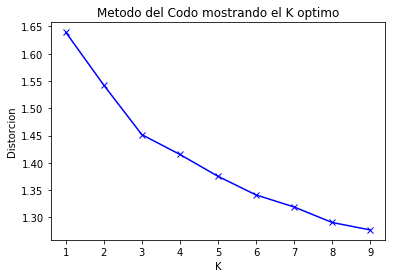

In [89]:
# Metodo del Codo
# 
# Convertir la matriz_incidencia generada en una matriz para ser usada con numpy
print(data_metodos)

distortions = []

data=data_metodos
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

# Plot del metodo del codo

plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distorcion')
plt.title('Metodo del Codo mostrando el K optimo')
plt.show()

In [88]:
# Metodo de Silhouette
# Entrega como resultado en donde el Slhouette_score optimo es 0.14092516241984757
# para un valor de 5 clusters.

range_n_clusters = [ 2, 3, 4, 5, 6, 7,8, 9, 10]
data_sil=data_metodos

for n_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10) 
    cluster_labels = kmeans.fit_predict(data_sil)

    # silhouette_score para n clusters
    silhouette_avg = silhouette_score(data_sil, cluster_labels)
    print("Para N clusters =", n_clusters,
          " Valor Silhouette_score :", silhouette_avg)

Para N clusters = 2  Valor Silhouette_score : 0.09365573283492713
Para N clusters = 3  Valor Silhouette_score : 0.11889942863638556
Para N clusters = 4  Valor Silhouette_score : 0.12347053919571699
Para N clusters = 5  Valor Silhouette_score : 0.14092516241984757
Para N clusters = 6  Valor Silhouette_score : 0.1371798939109807
Para N clusters = 7  Valor Silhouette_score : 0.1161092456616906
Para N clusters = 8  Valor Silhouette_score : 0.11339573832632867
Para N clusters = 9  Valor Silhouette_score : 0.12505960527779877
Para N clusters = 10  Valor Silhouette_score : 0.11928332134753233
